# Unsupervised Machine Learning project: creating a prototype for the development of music playlists using machine learning

## Business case

* Moosic is a small-scale startup.
* It relies on experts to curate the playlists they provide to their customers.
* They look to scale up operations.
* They are considering machine learning as an alternative to human-created playlists.
* A team of Data scientists has been hired to determine if machine learning is a viable alternative.

## Parameters

We are asked to keep the size of all the playlists between 50 and 250 songs.

At 5.235 songs in the playlist (starting count, prior to any cleaning), this means between 20.94 --> 21 (5.235/250) and 104.7 -->105 (5.235/50) playlists (clusters).

NOTE: after running the whole notebook (ie cleaning reflected), the length of dataset songs_df is 5.159.

# STEP 0: Preliminary steps

## Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans #for kmeans clustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer #diff scalers
from sklearn.decomposition import PCA #to run PCA (analysis)
from sklearn.datasets import make_blobs #to create artificial datasets
from sklearn.metrics import pairwise_distances #for creating heatmap
from sklearn.metrics import silhouette_score #to identify the optimal number of clusters

import matplotlib.pyplot as plt #for plotting/visualizing clusters
import seaborn as sns #for visualisation
import plotly.graph_objects as go #to create a scatterpolar object for the cluster

from sklearn import set_config #this modifies the sklearn settings (in this case, to outpu as pandas)
set_config(transform_output="pandas")

## Importing the 5000+ songs dataset

In [ ]:
# Get the spreadsheet ID and name
sheet_id = "1pzSg6QOyvskYLFxS1h14Jqujb3ERUEeR64Fxuzyx6YA"
sheet_name = "786966554"

# Construct the URL to the CSV export of the spreadsheet
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Read the CSV data into a Pandas DataFrame
songs_df = pd.read_csv(url)

songs_df = songs_df.set_index(['name','artist','html']).copy()

#alternatively, can set index column straight away; not doing so here, as want to set two columns as index.
#songs_df = pd.read_csv(url, index_col="name")

In [ ]:
songs_df.head(2)

,,,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id
name,artist,html,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,NaN,256213,4,1n7JnwviZ7zf0LR1tcGFq7
Saudade De Bahia,Antônio Carlos Jobim,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,1,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,NaN,191867,4,5QGM1U0eCYrQuwSJwTm5Zq


In [ ]:
# Drop the irrelevant column
songs_df = songs_df.drop(columns=["Unnamed: 0", "key", "mode", "type","duration_ms", "time_signature","id"]).copy()

In [ ]:
songs_df.head(2)

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,html,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.658,0.259,-13.141,0.0705,0.694,0.000059,0.975,0.306,110.376
Saudade De Bahia,Antônio Carlos Jobim,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.742,0.399,-12.646,0.0346,0.217,0.000002,0.107,0.693,125.039


## Ensuring the dataset is clean

Clean the dataset, as relevant (such as, removing white spaces or missing values)

In [ ]:
songs_df.isnull().sum() #checking to see if there are any missing values (there are none)

,0
danceability,0
energy,0
loudness,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0
valence,0
tempo,0


In [ ]:
songs_df.duplicated().sum()#checking to see if there are any duplicate values (there are 75)

75

In [ ]:
songs_df.drop_duplicates(inplace=True) #dropping the duplicate values/rows

In [ ]:
songs_df.duplicated().sum()#verifying all duplicates are gone

0

In [ ]:
songs_df.sort_values(by='danceability').head(2) #checking for "0" values (missing) across the rows

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,html,,,,,,,,,
Shake It Off,Taylor Swift,https://open.spotify.com/track/4461iENdKgtUYpveYwIarD,0.0000,0.00000,-60.000,0.0000,0.000,0.000,0.0000,0.0000,0.000
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.0596,0.00093,-42.959,0.0434,0.951,0.969,0.0772,0.0344,71.573


In [ ]:
#dropping "shake it off, Taylor Swift" as values are missing (value are "0" across the row)
songs_df = songs_df.drop(('Shake It Off', 'Taylor Swift'))

<ipython-input-11-e4727a7e769c>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  songs_df = songs_df.drop(('Shake It Off', 'Taylor Swift'))


In [ ]:
songs_df.sort_values(by='danceability').head(2) #verifying Taylor Swift is gone

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,html,,,,,,,,,
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.0596,0.00093,-42.959,0.0434,0.951000,0.969,0.0772,0.0344,71.573
Grave with a View - Studio,Darkthrone,https://open.spotify.com/track/7uYQSl0o0B21d5AKbaiA0N,0.0616,0.86500,-7.073,0.1020,0.000002,0.856,0.0512,0.2220,67.054


In [ ]:
songs_df.info() #checking to see if need to change any datatypes (do not)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5159 entries, ('Se Eu Quiser Falar Com Deus', 'Gilberto Gil', 'https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel', 'https://open.spotify.com/track/7E1ErYYCn0lYjHODZ1qGuB')
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5159 non-null   float64
 1   energy            5159 non-null   float64
 2   loudness          5159 non-null   float64
 3   speechiness       5159 non-null   float64
 4   acousticness      5159 non-null   float64
 5   instrumentalness  5159 non-null   float64
 6   liveness          5159 non-null   float64
 7   valence           5159 non-null   float64
 8   tempo             5159 non-null   float64
dtypes: float64(9)
memory

# STEP 1: Scaling the dataset

Data needs to be scaled to provide all features an equal weight. Selecting the scaler that makes the most sense for the project. First, comparing the different scalers here.

## No scaling

In [ ]:
# plotting without scaling
songs_no_scaling_df = pd.DataFrame(pairwise_distances(songs_df),
                                     index=songs_df.index,
                                     columns=songs_df.index)
songs_no_scaling_df = songs_no_scaling_df.iloc[:100,:100] #reducing size to see plot for a section of the dataset; 500 is the max to see any color


# Plotting the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(songs_no_scaling_df, linewidths=.2)
plt.title('Songs without Scaling')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## MinMaxScaler

In [ ]:
# Initialise the transformer (optionally, set parameters)
minmax_scaler = MinMaxScaler()

# Use the fit-transformer combo to transform the data
minmax_songs_df = minmax_scaler.fit_transform(songs_df)

In [ ]:
# Display non-scaled and scaled dataframes to compare -- here, looking at the scaling of only one column (columnn index 10 = the "tempo" column)
pd.DataFrame({
    'original': songs_df["tempo"],
    'min_max_scale': minmax_songs_df["tempo"]
}).sort_values(by='original')

,,,original,min_max_scale
name,artist,html,,
"French Suite No. 5 in G Major, BWV 816: I. Allemande",Johann Sebastian Bach,https://open.spotify.com/track/5w7zbR1ZV0Ee7tNFgVROwz,34.856,0.000000
Immortal Coil,Morpheus Descends,https://open.spotify.com/track/27IZlIBGSmhgpywsatVR1y,42.817,0.044442
Sunset Monet,Hauschka,https://open.spotify.com/track/0K9XD6kV0t9JTbk5w5TdUX,49.654,0.082609
I Got It Bad And That Ain't Good,Oscar Peterson Trio,https://open.spotify.com/track/4ol2UyMTiklHVujAWg02nE,49.689,0.082804
Forest Meditation,Henry Smith,https://open.spotify.com/track/5nOAhrQaLwweLkMvV8X9DD,49.820,0.083535
...,...,...,...,...
Ready Teddy,Little Richard,https://open.spotify.com/track/5wbZ3sbWf4PppzZiRxkxou,205.973,0.955246
(Sittin' On) the Dock of the Bay,Otis Redding,https://open.spotify.com/track/4Y4Gd3ty8uut6Qw43c7yJc,205.981,0.955290
Rebel Rouser,Duane Eddy,https://open.spotify.com/track/4nAJtcmiyoL0ARY5WZY9IN,206.313,0.957144


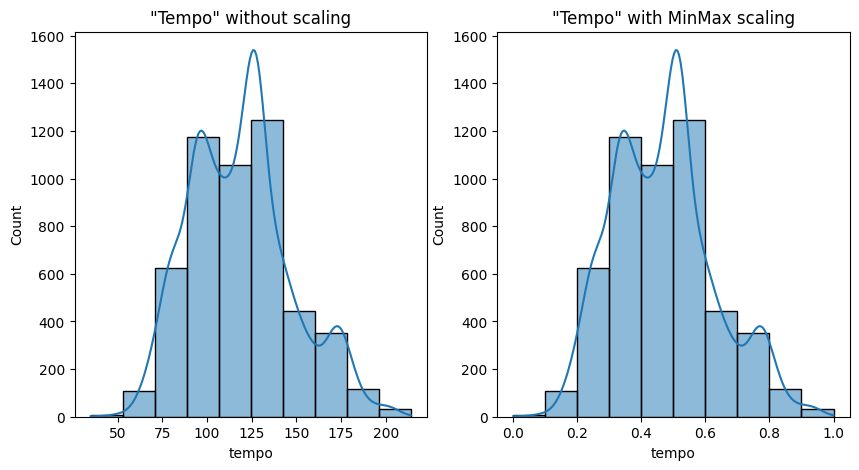

In [ ]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plotting the two plots
sns.histplot(data=songs_df["tempo"], bins=10, kde=True, ax=ax1);
sns.histplot(minmax_songs_df["tempo"], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('"Tempo" without scaling')
ax2.set_title('"Tempo" with MinMax scaling')

plt.show()

## Standard scaler

In [ ]:
# Create a StandardScaler object
standard_scaler = StandardScaler().set_output(transform="pandas")

# Scale the ten_songs DataFrame
standard_songs_df = standard_scaler.fit_transform(songs_df)

In [ ]:
# Display non-scaled and scaled dataframes to compare -- here, looking at the scaling of only one column (columnn index 10 = the "tempo" column)
pd.DataFrame({
    'original': songs_df["tempo"],
    'standard_scale': standard_songs_df["tempo"]
}).sort_values(by='original')

,,,original,standard_scale
name,artist,html,,
"French Suite No. 5 in G Major, BWV 816: I. Allemande",Johann Sebastian Bach,https://open.spotify.com/track/5w7zbR1ZV0Ee7tNFgVROwz,34.856,-2.935538
Immortal Coil,Morpheus Descends,https://open.spotify.com/track/27IZlIBGSmhgpywsatVR1y,42.817,-2.656760
Sunset Monet,Hauschka,https://open.spotify.com/track/0K9XD6kV0t9JTbk5w5TdUX,49.654,-2.417343
I Got It Bad And That Ain't Good,Oscar Peterson Trio,https://open.spotify.com/track/4ol2UyMTiklHVujAWg02nE,49.689,-2.416117
Forest Meditation,Henry Smith,https://open.spotify.com/track/5nOAhrQaLwweLkMvV8X9DD,49.820,-2.411530
...,...,...,...,...
Ready Teddy,Little Richard,https://open.spotify.com/track/5wbZ3sbWf4PppzZiRxkxou,205.973,3.056621
(Sittin' On) the Dock of the Bay,Otis Redding,https://open.spotify.com/track/4Y4Gd3ty8uut6Qw43c7yJc,205.981,3.056901
Rebel Rouser,Duane Eddy,https://open.spotify.com/track/4nAJtcmiyoL0ARY5WZY9IN,206.313,3.068527


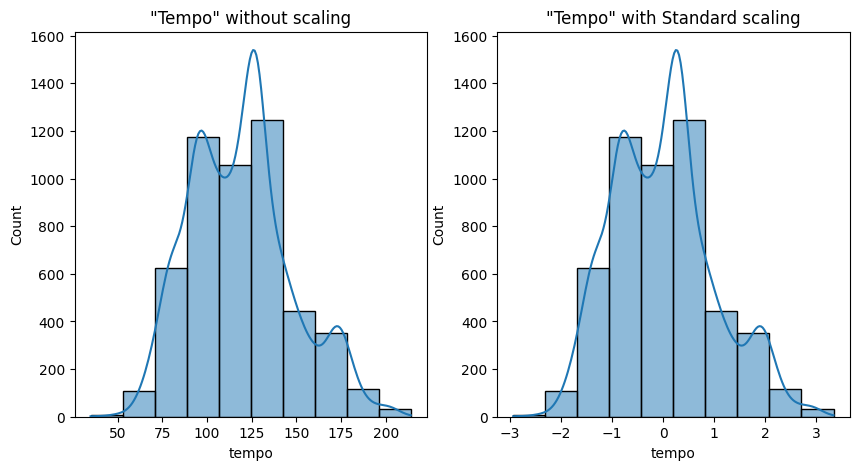

In [ ]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plotting the two plots
sns.histplot(data=songs_df["tempo"], bins=10, kde=True, ax=ax1);
sns.histplot(standard_songs_df["tempo"], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('"Tempo" without scaling')
ax2.set_title('"Tempo" with Standard scaling')

plt.show()

## Robust scaler

In [ ]:
# Create a RobustScaler object
robust_scaler = RobustScaler().set_output(transform="pandas")

# Scale the ten_songs DataFrame
robust_songs_df = robust_scaler.fit_transform(songs_df)

In [ ]:
# Display non-scaled and scaled dataframes to compare -- here, looking at the scaling of only one column (columnn index 10 = the "tempo" column)
#NOTE: the following code would normally work (it is the same code applied to all other scalers) but for whatever reason, giving an error.
#ERROR: "ValueError: cannot handle a non-unique multi-index!" meaning there are duplicate multi-index, which I cannot find.
#As a way around that, keeping only the unique rows (see next code box).

#pd.DataFrame({
#     'original': songs_df["tempo"],
#     'robust_scale': robust_songs_df["tempo"]
# }).sort_values(by='robust_scale')

In [ ]:
# NOTE: the following code is to bypass the above blockage
# code only intended to print out for comparison
# Remove duplicate indices, keeping the first occurrence
songs_df_unique = songs_df[~songs_df.index.duplicated(keep='first')]
robust_songs_df_unique = robust_songs_df[~robust_songs_df.index.duplicated(keep='first')]

# Proceed with your DataFrame creation and sorting
combined_df = pd.DataFrame({
    'original': songs_df_unique["tempo"],
    'robust_scale': robust_songs_df_unique["tempo"]
}).sort_values(by='original')

combined_df.head(2)

,,,original,robust_scale
name,artist,html,,
"French Suite No. 5 in G Major, BWV 816: I. Allemande",Johann Sebastian Bach,https://open.spotify.com/track/5w7zbR1ZV0Ee7tNFgVROwz,34.856,-2.216352
Immortal Coil,Morpheus Descends,https://open.spotify.com/track/27IZlIBGSmhgpywsatVR1y,42.817,-2.006689


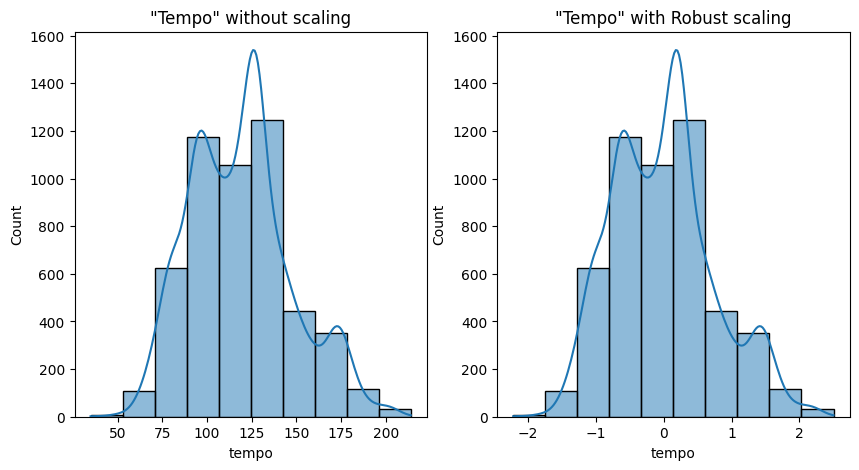

In [ ]:
# Stating that we want two plots -- here, looking at the scaling of only one column (columnn index 10 = the "tempo" column)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plotting the two plots
sns.histplot(data=songs_df["tempo"], bins=10, kde=True, ax=ax1);
sns.histplot(robust_songs_df["tempo"], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('"Tempo" without scaling')
ax2.set_title('"Tempo" with Robust scaling')

plt.show()

## Quantile transformer

In [ ]:
# Number of samples
number_of_samples = songs_df.shape[0]

# Create a QuantileTransformer object
quantile_transformer_scaler = QuantileTransformer(n_quantiles = number_of_samples).set_output(transform="pandas")

# Transform the DataFrame
quantile_songs_df = quantile_transformer_scaler.fit_transform(songs_df)

In [ ]:
# Display column of original DataFrame and column of Quantile DataFrame to compare -- here, looking at the scaling of only one column (columnn index 10 = the "tempo" column)
pd.DataFrame({
    'original': songs_df["tempo"],
    'quantile_transformed': quantile_songs_df["tempo"]
}).sort_values(by='original').head(2)

,,,original,quantile_transformed
name,artist,html,,
"French Suite No. 5 in G Major, BWV 816: I. Allemande",Johann Sebastian Bach,https://open.spotify.com/track/5w7zbR1ZV0Ee7tNFgVROwz,34.856,0.000000
Immortal Coil,Morpheus Descends,https://open.spotify.com/track/27IZlIBGSmhgpywsatVR1y,42.817,0.000194


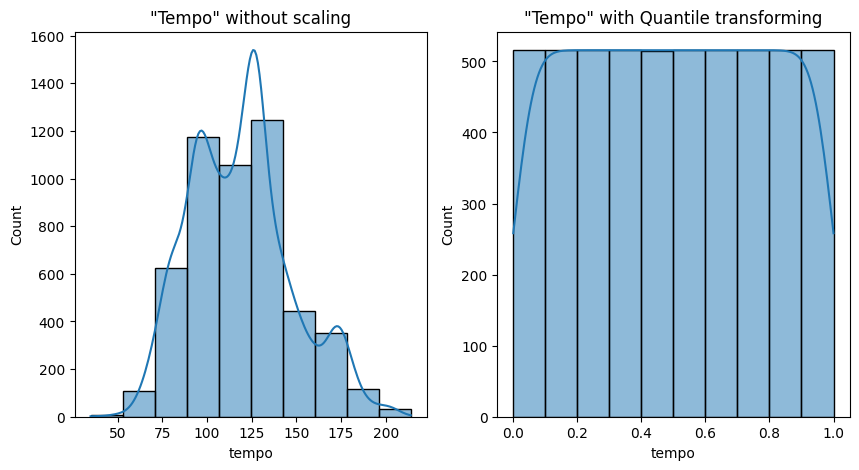

In [ ]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plotting the two plots
sns.histplot(data=songs_df["tempo"], bins=10, kde=True, ax=ax1);
sns.histplot(quantile_songs_df["tempo"], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('"Tempo" without scaling')
ax2.set_title('"Tempo" with Quantile transforming')

plt.show()

## Power transformer

In [ ]:
# Create a PowerTransformer object
power_scaler = PowerTransformer().set_output(transform="pandas")

# Transform the songs_df DataFrame
power_songs_df = power_scaler.fit_transform(songs_df)

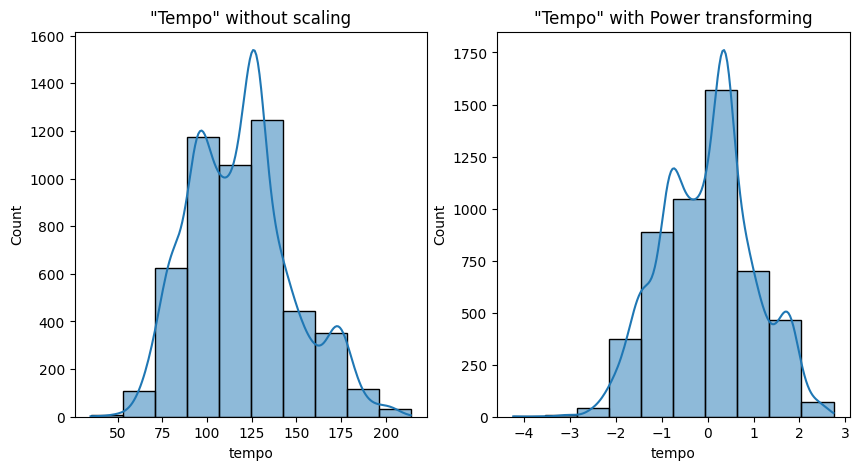

In [ ]:
# Stating that we want two plots-- here, looking at the scaling of only one column (columnn index 10 = the "tempo" column)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))

# Plotting the two plots
sns.histplot(data=songs_df["tempo"], bins=10, kde=True, ax=ax1);
sns.histplot(data=power_songs_df["tempo"], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('"Tempo" without scaling')
ax2.set_title('"Tempo" with Power transforming')

plt.show()

## Comparing all 6 options (scaling and transforming)

Visualize the scales for hints on which is the better scaling.  

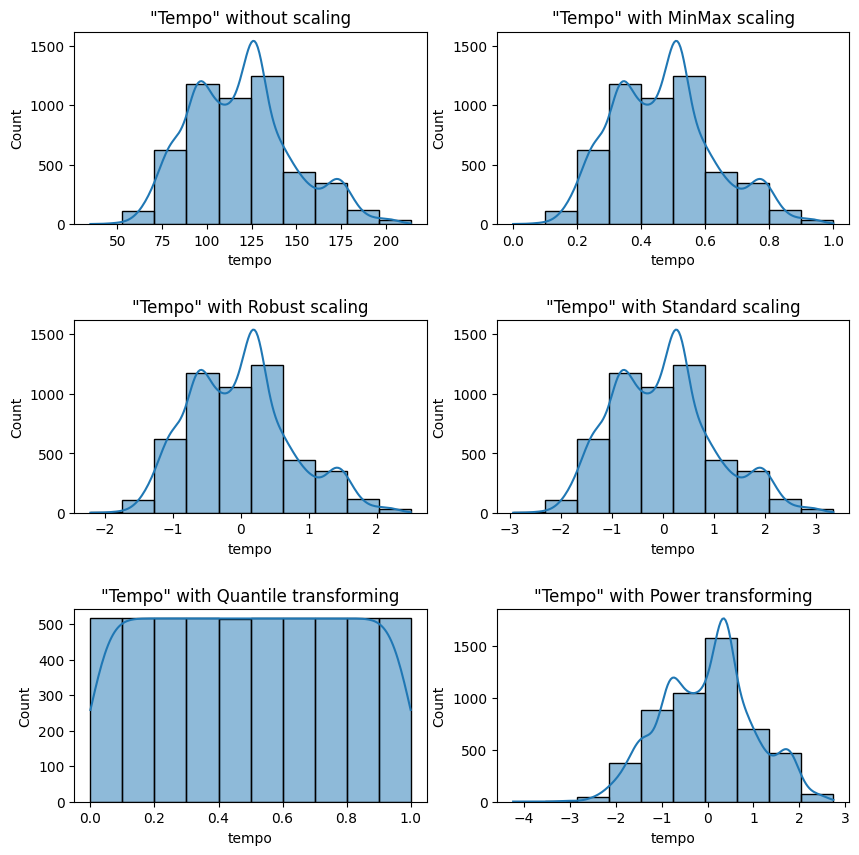

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=songs_df["tempo"], bins=10, kde=True, ax=ax[0, 0]);
sns.histplot(data=minmax_songs_df["tempo"], bins=10, kde=True, ax=ax[0, 1]);
sns.histplot(data=robust_songs_df["tempo"], bins=10, kde=True, ax=ax[1, 0]);
sns.histplot(data=standard_songs_df["tempo"], bins=10, kde=True, ax=ax[1, 1]);
sns.histplot(data=quantile_songs_df["tempo"], bins=10, kde=True, ax=ax[2, 0]);
sns.histplot(data=power_songs_df["tempo"], bins=10, kde=True, ax=ax[2, 1]);

ax[0, 0].set_title('"Tempo" without scaling')
ax[0, 1].set_title('"Tempo" with MinMax scaling')
ax[1, 0].set_title('"Tempo" with Robust scaling')
ax[1, 1].set_title('"Tempo" with Standard scaling')
ax[2, 0].set_title('"Tempo" with Quantile transforming')
ax[2, 1].set_title('"Tempo" with Power transforming')

# Adjusting space between rows
plt.subplots_adjust(hspace=0.5)  # Increase hspace to add more vertical space

plt.show()

# STEPS 2-5 are run on Quantile Transformed Data!

Selected Quantile Transformer to scale dataset.

# STEP 2: Principal Components Analysis (PCA)

Datasets with "n" number of features would create "n" number of principal components. Keeping features with greatest information versus with least information.  

In [ ]:
# Initialise the PCA object -- NOTE: using the quicker PCA approach here; the longer version fits then transforms the scaled (then prints to see the pca columns)
pca_quantile = PCA()

# Fit the PCA object to the data
pca_quantile.fit(quantile_songs_df) #applying here PCA to the output of quantile transformer (scaler)

pca_quantile_df = pca_quantile.transform(quantile_songs_df)

pca_quantile_df.head(2)

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
name,artist,html,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,-0.307805,-0.253638,0.276905,0.467681,0.364099,-0.027862,0.084281,0.210485,0.025996
Saudade De Bahia,Antônio Carlos Jobim,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,-0.195079,-0.613013,0.093179,-0.190307,-0.036329,0.139863,-0.158594,0.216304,0.034469


## Indentifying the most imformative principal components

In [ ]:
# Get the variance explained by each principal component # with application of PCA only on quantile transformed data
pca_quantile_variance_array = pca_quantile.explained_variance_ratio_

pca_quantile_variance_array

array([0.29307529, 0.2763112 , 0.10546617, 0.10434167, 0.07298137,
       0.06601699, 0.03986537, 0.02876379, 0.01317816])

## Determining which principal components to keep

There are two methods for determining how many principal components to keep: the "elbow" method and the "comulative explained variance" (or CEV) method.

### Method 1: Elbow

The **elbow point** marks the point at which the explained variance starts to reduce significantly.

In [ ]:
pd.DataFrame(pca_quantile_variance_array, columns=["Variance explained"])

,Variance explained
0,0.293075
1,0.276311
2,0.105466
3,0.104342
4,0.072981
5,0.066017
6,0.039865
7,0.028764
8,0.013178


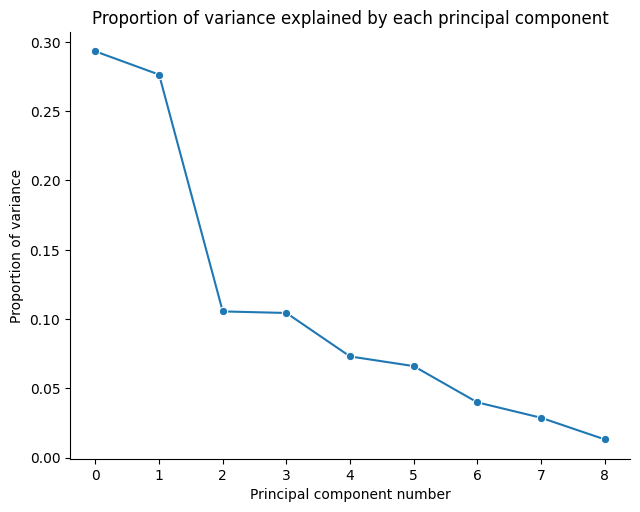

In [ ]:
# Create a Pandas DataFrame from the variance explained array
pca_quantile_variance_array_dataframe = pd.DataFrame(pca_quantile_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = pca_quantile_variance_array_dataframe,
      x = pca_quantile_variance_array_dataframe.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

In [ ]:
# Set the variable elbow to where you believe the elbow is
elbow = 6

In [ ]:
# Create a PCA object with {elbow} principal components
# We add 1 as the principal components start at 0 and not 1 (index numbering)
pca_elbow_quantile = PCA(n_components = elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_quantile_fit_transformed = pca_elbow_quantile.fit_transform(quantile_songs_df) #applying here PCA to the output of quantile transformer (scaler)
pca_elbow_quantile_fit_transformed.head(2)

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6
name,artist,html,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,-0.307805,-0.253638,0.276905,0.467681,0.364099,-0.027862,0.084281
Saudade De Bahia,Antônio Carlos Jobim,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,-0.195079,-0.613013,0.093179,-0.190307,-0.036329,0.139863,-0.158594


### Method 2: Cumulative explained variance (CEV)

We can also look for an elbow in the cumulative variance plot to determine how many principal components to retain.

Setting a cumulative variance threshold in the PCA constructor instead of looking for an elbow in the cumulative variance plot to determine how many principal components to retain.  This threshold tells scikit-learn how many principal components to retain. For example, 0.95 tells scikit-learn that we want to retain as many principle components as contain 95% or more of the variance.

In [ ]:
cumulative_sum_quantile_explained_variance = np.cumsum(pca_quantile_variance_array)

In [ ]:
cumulative_sum_quantile_explained_variance

array([0.29307529, 0.56938649, 0.67485265, 0.77919432, 0.85217569,
       0.91819268, 0.95805805, 0.98682184, 1.        ])

**--> Creating a cumulative explained variance plot**

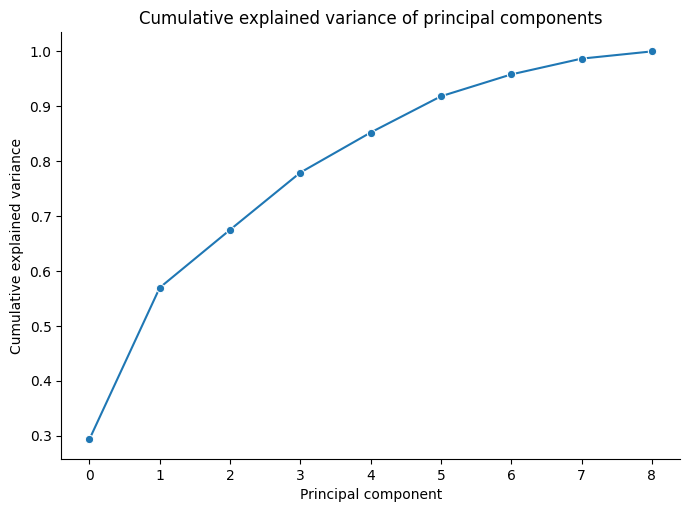

In [ ]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(pca_quantile_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_quantile_explained_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )


  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

**--> Finding out how many components make up 95% of the variance**`

In [ ]:
#Create a PCA object
pca_quantile_variance = PCA(n_components = 0.95)

In [ ]:
# Calculate the cumulative sum
cumulative_sum_quantile_explained_variance = np.cumsum(pca_quantile_variance_array)

# Find the index where the cumulative sum reaches 0.95
index = np.searchsorted(cumulative_sum_quantile_explained_variance, 0.95)

# Print the number of components required to reach 0.95 variance
print(index + 1)

7


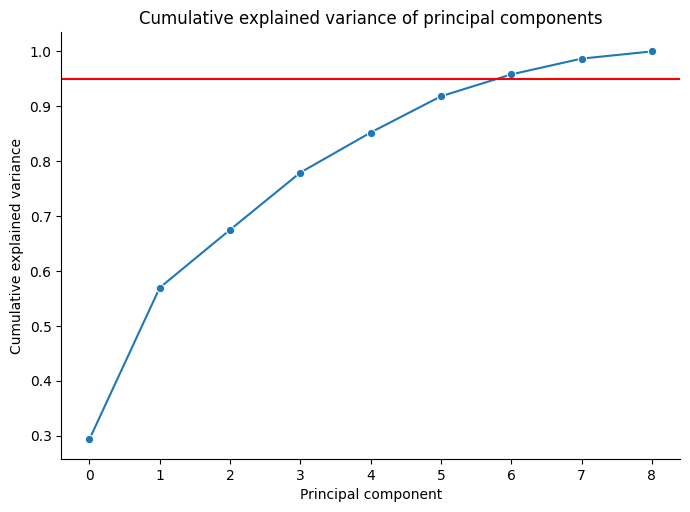

In [ ]:
#plotting the number of components making up 95% of the variance -- see red line
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(pca_quantile_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_quantile_explained_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )


  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

# STEP 3: Kmeans clustering

Kmeans is used to automatically group data into clusters. Determine the optimal number of clusters to use.

### Business sense

There are two methods technical approaches(inertia/else and silhoutte) but another important approach is using business sense.  In the end, refer to use case to determine the number of clusters.

## Estimating the number of cluster (k) - NO PCA

### NO PCA - Clustering - inertia/elbow

Inertia is a measure of how well data points fit into their assigned clusters. Lower inertia indicates a better fit. Note: minimising inertia alone can lead to meaningless clusters, with each data point in its own cluster (i.e. 1 cluster with only 1 data point).

After plotting the inertia scores in a line chart, we look for the "elbow" = the point where the inertia score starts to plateau, indicating that adding more clusters is not significantly improving the quality of the clustering.

In [ ]:
quantile_songs_df.shape #scaled dataframe

(5159, 9)

In [ ]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k_songs = 110

# Create an empty list to store the inertia scores
inertia_list_songs = []

# Iterate over the range of cluster numbers
for i in range(5, max_k_songs + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(quantile_songs_df)

    # Append the inertia score to the list
    inertia_list_songs.append(myKMeans.inertia_)

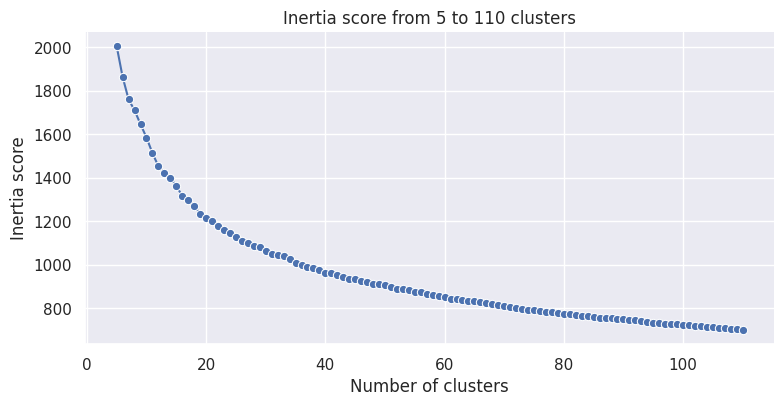

In [ ]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list_songs,
            x = range(5, max_k_songs + 1),
            kind = 'line',
            marker = 'o',
            height = 4,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 5 to {max_k_songs} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

### NO PCA - Clustering - silhoutte score

The silhoutte coefficient allows to identify the optimal number of clusters.  The higher the silhouette score, the better the clustering.

In [ ]:
# Set the maximum number of clusters to try
max_k_songs = 110

# Create an empty list to store the silhouette scores
sil_scores_songs = []


for j in range(5, max_k_songs):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(quantile_songs_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(quantile_songs_df, labels)

    # Append the silhouette score to the list
    sil_scores_songs.append(score)

In [ ]:
songs_df.shape

(5159, 9)

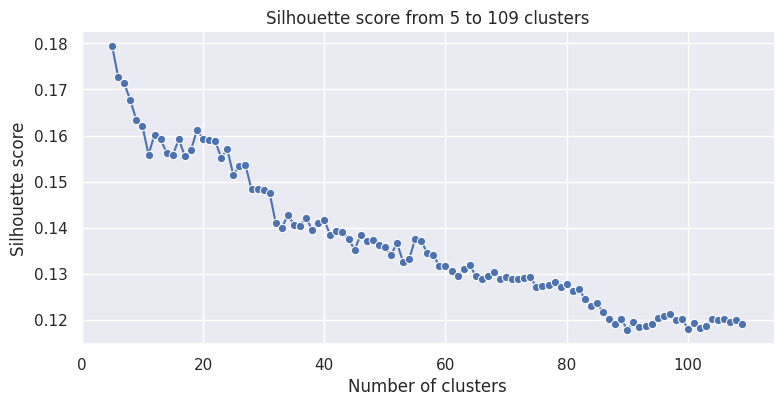

In [ ]:
(
sns.relplot(y = sil_scores_songs,
            x = range(5, max_k_songs),
            kind = 'line',
            marker = 'o',
            height = 4,
            aspect = 2)
.set(title=f"Silhouette score from 5 to {max_k_songs - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

### NO PCA - Cluster groupings, cluster means, and visualization with Radar chart

### NO PCA - Applied dataframe

In [ ]:
quantile_songs_df.head(2)

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,html,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.704052,0.147053,0.188833,0.614482,0.789841,0.379604,0.999031,0.378926,0.411206
Saudade De Bahia,Antônio Carlos Jobim,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.835595,0.208511,0.205603,0.155874,0.608085,0.262699,0.369426,0.763571,0.593932


### NO PCA - Cluster means

In [ ]:
# Initialise the model
my_kmeans_songs = KMeans(n_clusters = 30, # you always choose the number of k here
                   random_state = 123)

# Fit the model to the data
my_kmeans_songs.fit(quantile_songs_df)

# Obtain the cluster output
my_kmeans_clusters = my_kmeans_songs.labels_

# Attach the cluster output to our original DataFrame
quantile_songs_df["my_kmeans_clusters"] = my_kmeans_clusters

quantile_songs_df.sort_values(by="my_kmeans_clusters").head(2)

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,my_kmeans_clusters
name,artist,html,,,,,,,,,,
After Life (feat. Stacy Barthe),Tchami,https://open.spotify.com/track/3dhPpCQvw3kn7so6mkTbJ3,0.605370,0.762602,0.870105,0.362544,0.172935,0.726541,0.060295,0.098391,0.608957,0
Pyramids,DVBBS,https://open.spotify.com/track/0rfqwCJCxAnNGJBjnYHHVm,0.731582,0.882706,0.995929,0.423517,0.176037,0.598100,0.074351,0.294106,0.676231,0


In [ ]:
quantile_songs_df.groupby(by="my_kmeans_clusters").mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
my_kmeans_clusters,,,,,,,,,
0,0.623955,0.731258,0.839569,0.548432,0.305431,0.603606,0.219947,0.324990,0.687718
1,0.706825,0.691860,0.758230,0.317662,0.403211,0.445138,0.168316,0.812682,0.605267
2,0.228017,0.114749,0.122252,0.264469,0.872739,0.685629,0.767008,0.208091,0.185392
3,0.153111,0.831567,0.464373,0.732852,0.128614,0.757185,0.756300,0.280979,0.839137
4,0.793398,0.539319,0.743382,0.824769,0.541404,0.061685,0.747619,0.683987,0.231312
5,0.511751,0.384984,0.673636,0.237844,0.573690,0.041634,0.429729,0.397363,0.724303
6,0.524009,0.522769,0.607308,0.198609,0.337629,0.500117,0.766350,0.432630,0.510929
7,0.876784,0.339038,0.356621,0.707047,0.544071,0.452964,0.242109,0.750231,0.381000
8,0.541461,0.621326,0.570299,0.292801,0.451989,0.609431,0.691430,0.827743,0.800982


### NO PCA - Radar chart

In [ ]:
# Determining the number of columns in the data
quantile_songs_df.shape[1]

10

In [ ]:
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects_songs = []

# State the label for each arm of the chart
categories = quantile_songs_df.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(quantile_songs_df['my_kmeans_clusters'].unique()):

  # Find the mean value for each column of the cluster - keep the last column out of scatter as it is only the "cluster" column
  cluster_means = [quantile_songs_df.loc[quantile_songs_df["my_kmeans_clusters"] == cluster, quantile_songs_df.columns[0]].mean(),
                  quantile_songs_df.loc[quantile_songs_df["my_kmeans_clusters"] == cluster, quantile_songs_df.columns[1]].mean(),
                  quantile_songs_df.loc[quantile_songs_df["my_kmeans_clusters"] == cluster, quantile_songs_df.columns[2]].mean(),
                  quantile_songs_df.loc[quantile_songs_df["my_kmeans_clusters"] == cluster, quantile_songs_df.columns[3]].mean(),
                  quantile_songs_df.loc[quantile_songs_df["my_kmeans_clusters"] == cluster, quantile_songs_df.columns[4]].mean(),
                  quantile_songs_df.loc[quantile_songs_df["my_kmeans_clusters"] == cluster, quantile_songs_df.columns[5]].mean(),
                  quantile_songs_df.loc[quantile_songs_df["my_kmeans_clusters"] == cluster, quantile_songs_df.columns[6]].mean(),
                  quantile_songs_df.loc[quantile_songs_df["my_kmeans_clusters"] == cluster, quantile_songs_df.columns[7]].mean(),
                  quantile_songs_df.loc[quantile_songs_df["my_kmeans_clusters"] == cluster, quantile_songs_df.columns[8]].mean()]

  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means, # set the radial coordinates
    theta = categories, # the names of the columns
    fill = 'toself', # fills in the space with colour
    name = f'Cluster {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects_songs.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects_songs)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of songs by cluster',
  height = 800,
  width = 900,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()

## Estimating the number of cluster (k) - WITH PCA

### WITH PCA - Clustering - inertia/elbow

In [ ]:
pca_elbow_quantile_fit_transformed.shape #scaled and PCA'd dataframe

(5159, 7)

In [ ]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k_songs = 300

# Create an empty list to store the inertia scores
inertia_list_songs_pca = []

# Iterate over the range of cluster numbers
for i in range(5, max_k_songs + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(pca_elbow_quantile_fit_transformed)

    # Append the inertia score to the list
    inertia_list_songs_pca.append(myKMeans.inertia_)

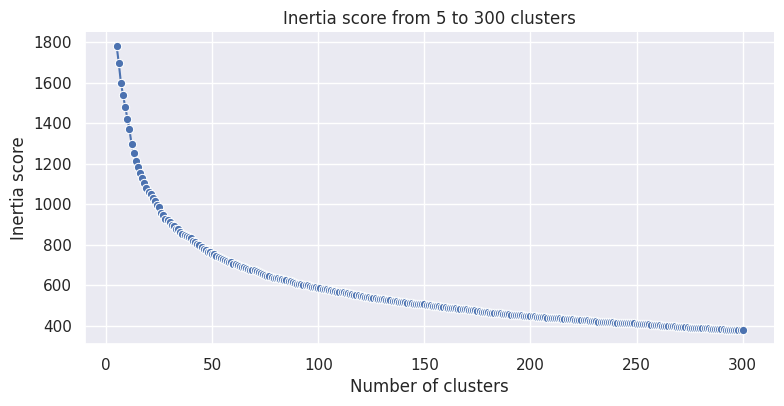

In [ ]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list_songs_pca,
            x = range(5, max_k_songs + 1),
            kind = 'line',
            marker = 'o',
            height = 4,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 5 to {max_k_songs} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

### WITH PCA - Clustering - silhoutte score

In [ ]:
# Set the maximum number of clusters to try
max_k_songs = 110

# Create an empty list to store the silhouette scores
sil_scores_songs_pca = []


for j in range(5, max_k_songs):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(pca_elbow_quantile_fit_transformed)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(pca_elbow_quantile_fit_transformed, labels)

    # Append the silhouette score to the list
    sil_scores_songs_pca.append(score)

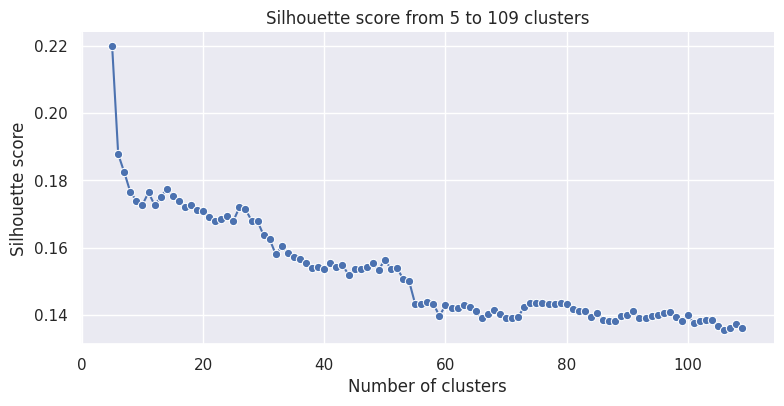

In [ ]:
(
sns.relplot(y = sil_scores_songs_pca,
            x = range(5, max_k_songs),
            kind = 'line',
            marker = 'o',
            height = 4,
            aspect = 2)
.set(title=f"Silhouette score from 5 to {max_k_songs - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

### WITH PCA - Cluster groupings, cluster means, and visualization with Radar chart

### WITH PCA - Applied dataframe

In [ ]:
pca_elbow_quantile_fit_transformed.head(2) #this is the dataframe where data has been scaled using the quantile transformer and has the kept PCAs (=9 columns)

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6
name,artist,html,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,-0.307805,-0.253638,0.276905,0.467681,0.364099,-0.027862,0.084281
Saudade De Bahia,Antônio Carlos Jobim,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,-0.195079,-0.613013,0.093179,-0.190307,-0.036329,0.139863,-0.158594


### WITH PCA - Cluster means

In [ ]:
# Initialise the model
my_kmeans_songs_PCA = KMeans(n_clusters = 26, # you always choose the number of k here NOTE: "ideal" was 14 or increased to 27 to meet business case
                   random_state = 123)

# Fit the model to the data
my_kmeans_songs_PCA.fit(pca_elbow_quantile_fit_transformed)

# Obtain the cluster output
clusters = my_kmeans_songs_PCA.labels_

# Attach the cluster output to our original DataFrame
pca_elbow_quantile_fit_transformed["clusters"] = clusters

pca_elbow_quantile_fit_transformed.sort_values(by="clusters").head(2)

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,clusters
name,artist,html,,,,,,,,
Scars Of The Crucifix,Deicide,https://open.spotify.com/track/3ztZNULykf6ijrqJRcfZAJ,0.210321,0.782106,-0.422907,-0.030543,-0.256992,-0.051032,0.22722,0
Blood Bath,Cancer,https://open.spotify.com/track/1rDf5MXuuk2fUNZpE9Xd86,-0.048000,0.572557,-0.401533,-0.337444,-0.124893,0.024122,-0.30523,0


In [ ]:
pca_elbow_quantile_fit_transformed.groupby(by="clusters").mean()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
clusters,,,,,,,
0,0.092497,0.655401,-0.454472,-0.077485,-0.104697,-0.016005,-0.115239
1,-0.569139,-0.267450,-0.104724,0.052391,0.109409,0.186638,0.067402
2,0.152286,0.099126,0.315025,-0.031181,-0.220028,0.228075,0.042573
3,0.110135,-0.385235,-0.059935,0.432529,0.312479,-0.145710,-0.112904
4,-0.094951,-0.596339,0.179722,0.196386,-0.129809,0.012314,-0.188957
5,-0.071608,0.612714,-0.010300,0.217582,-0.019486,0.163600,-0.171041
6,0.535093,-0.309786,-0.120892,0.418080,0.123983,-0.020581,0.087357
7,-0.234868,-0.347351,0.245711,-0.250015,-0.102316,-0.279858,-0.057357
8,0.421103,-0.423434,-0.465166,-0.025156,0.100674,-0.057636,0.042616


### WITH PCA - Radar chart

It makes no sense to do a radar chart on a PCAs dataset as the columns are no longer features.

# STEP 4: Creating the playlists

* Use DataFrame resulting from STEP 3 to create separate playlists (i.e. group according to cluster)
* Rename clusters to actual playlist names (i.e. go by genre or activity?)
* Merge DataFrame with original one to get artist name and Spotify links to songs
* Consider exporting playlists as.csv files




## NO PCA

### Groundwork

In [ ]:
quantile_songs_df.shape

(5159, 10)

In [ ]:
quantile_songs_df.head(2)

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,my_kmeans_clusters
name,artist,html,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.704052,0.147053,0.188833,0.614482,0.789841,0.379604,0.999031,0.378926,0.411206,25
Saudade De Bahia,Antônio Carlos Jobim,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.835595,0.208511,0.205603,0.155874,0.608085,0.262699,0.369426,0.763571,0.593932,20


In [ ]:
quantile_songs_df.groupby("my_kmeans_clusters")["tempo"].count().describe()

,tempo
count,30.000000
mean,171.966667
std,44.522357
min,112.000000
25%,136.750000
50%,161.500000
75%,208.750000
max,256.000000


In [ ]:
songs_quantile_clusters = quantile_songs_df.reset_index().copy()
songs_quantile_clusters.head(1)

,name,artist,html,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,my_kmeans_clusters
0,Se Eu Quiser Falar Com Deus,Gilberto Gil,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,0.704052,0.147053,0.188833,0.614482,0.789841,0.379604,0.999031,0.378926,0.411206,25


In [ ]:
songs_quantile_clusters=songs_quantile_clusters[['name','artist','html','my_kmeans_clusters']].copy()

### Playlists

In [ ]:
playlist_00 = songs_quantile_clusters.query("my_kmeans_clusters== 0").copy()
playlist_01 = songs_quantile_clusters.query("my_kmeans_clusters== 1").copy()
playlist_02 = songs_quantile_clusters.query("my_kmeans_clusters== 2").copy()
playlist_03 = songs_quantile_clusters.query("my_kmeans_clusters== 3").copy()
playlist_04 = songs_quantile_clusters.query("my_kmeans_clusters== 4").copy()
playlist_05 = songs_quantile_clusters.query("my_kmeans_clusters== 5").copy()
playlist_06 = songs_quantile_clusters.query("my_kmeans_clusters== 6").copy()
playlist_07 = songs_quantile_clusters.query("my_kmeans_clusters== 7").copy()
playlist_08 = songs_quantile_clusters.query("my_kmeans_clusters== 8").copy()
playlist_09 = songs_quantile_clusters.query("my_kmeans_clusters== 9").copy()
playlist_10 = songs_quantile_clusters.query("my_kmeans_clusters== 10").copy()
playlist_11 = songs_quantile_clusters.query("my_kmeans_clusters== 11").copy()
playlist_12 = songs_quantile_clusters.query("my_kmeans_clusters== 12").copy()
playlist_13 = songs_quantile_clusters.query("my_kmeans_clusters== 13").copy()
playlist_14 = songs_quantile_clusters.query("my_kmeans_clusters== 14").copy()
playlist_15 = songs_quantile_clusters.query("my_kmeans_clusters== 15").copy()
playlist_16 = songs_quantile_clusters.query("my_kmeans_clusters== 16").copy()
playlist_17 = songs_quantile_clusters.query("my_kmeans_clusters== 17").copy()
playlist_18 = songs_quantile_clusters.query("my_kmeans_clusters== 18").copy()
playlist_19 = songs_quantile_clusters.query("my_kmeans_clusters== 19").copy()
playlist_20 = songs_quantile_clusters.query("my_kmeans_clusters== 20").copy()
playlist_21 = songs_quantile_clusters.query("my_kmeans_clusters== 21").copy()
playlist_22 = songs_quantile_clusters.query("my_kmeans_clusters== 22").copy()
playlist_23 = songs_quantile_clusters.query("my_kmeans_clusters== 23").copy()
playlist_24 = songs_quantile_clusters.query("my_kmeans_clusters== 24").copy()
playlist_25 = songs_quantile_clusters.query("my_kmeans_clusters== 25").copy()
playlist_26 = songs_quantile_clusters.query("my_kmeans_clusters== 26").copy()
playlist_27 = songs_quantile_clusters.query("my_kmeans_clusters== 27").copy()
playlist_28 = songs_quantile_clusters.query("my_kmeans_clusters== 28").copy()
playlist_29 = songs_quantile_clusters.query("my_kmeans_clusters== 29").copy()

In [ ]:
#playlist_08.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Chapter_7_Unsupervised_Machine_Learning/Chapter_7_playlists/playlist_08.csv',index=False)

In [ ]:
#playlist_14.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Chapter_7_Unsupervised_Machine_Learning/Chapter_7_playlists/playlist_14.csv',index=False)

In [ ]:
#saving playlist as .csv file; NOTE: need to update file at start and end of the code

#playlist_16.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Chapter_7_Unsupervised_Machine_Learning/Chapter_7_playlists/playlist_16.csv',index=False)

In [ ]:
# to verifying csv
df_verify = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Chapter_7_Unsupervised_Machine_Learning/Chapter_7_playlists/playlist_16.csv')
print(df_verify.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                219 non-null    object
 1   artist              219 non-null    object
 2   html                219 non-null    object
 3   my_kmeans_clusters  219 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 7.0+ KB
None


## WITH PCA

### Groundwork

In [ ]:
pca_elbow_quantile_fit_transformed.shape

(5159, 8)

In [ ]:
pca_elbow_quantile_fit_transformed.head(2)

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,clusters
name,artist,html,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,-0.307805,-0.253638,0.276905,0.467681,0.364099,-0.027862,0.084281,3
Saudade De Bahia,Antônio Carlos Jobim,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,-0.195079,-0.613013,0.093179,-0.190307,-0.036329,0.139863,-0.158594,11


In [ ]:
pca_elbow_quantile_fit_transformed.groupby("clusters")["pca6"].count().describe()

,pca6
count,26.000000
mean,198.423077
std,49.103298
min,117.000000
25%,165.250000
50%,187.500000
75%,222.250000
max,354.000000


In [ ]:
pca_elbow_quantile_fit_transformed = pca_elbow_quantile_fit_transformed.reset_index().copy()
pca_elbow_quantile_fit_transformed.head(1)

,name,artist,html,pca0,pca1,pca2,pca3,pca4,pca5,pca6,clusters
0,Se Eu Quiser Falar Com Deus,Gilberto Gil,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,-0.307805,-0.253638,0.276905,0.467681,0.364099,-0.027862,0.084281,3


In [ ]:
pca_elbow_quantile_fit_transformed=pca_elbow_quantile_fit_transformed[['name','artist','html','clusters']].copy()

In [ ]:
playlist_00_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 0").copy()
playlist_01_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 1").copy()
playlist_02_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 2").copy()
playlist_03_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 3").copy()
playlist_04_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 4").copy()
playlist_05_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 5").copy()
playlist_06_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 6").copy()
playlist_07_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 7").copy()
playlist_08_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 8").copy()
playlist_09_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 9").copy()
playlist_10_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 10").copy()
playlist_11_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 11").copy()
playlist_12_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 12").copy()
playlist_13_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 13").copy()
playlist_14_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 14").copy()
playlist_15_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 15").copy()
playlist_16_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 16").copy()
playlist_17_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 17").copy()
playlist_18_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 18").copy()
playlist_19_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 19").copy()
playlist_20_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 20").copy()
playlist_21_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 21").copy()
playlist_22_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 22").copy()
playlist_23_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 23").copy()
playlist_24_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 24").copy()
playlist_25_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 25").copy()
playlist_26_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 26").copy()
playlist_27_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 27").copy()
playlist_28_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 28").copy()
playlist_29_PCA = pca_elbow_quantile_fit_transformed.query("clusters== 29").copy()

In [ ]:
#playlist pairs with playlist_08 "Happy listening" (no PCA)
playlist_02_PCA.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Chapter_7_Unsupervised_Machine_Learning/Chapter_7_playlists/playlist_02_PCA.csv',index=False)

In [ ]:
#playlist pairs with playlist_14 "Jazzy" (no PCA)
playlist_01_PCA.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Chapter_7_Unsupervised_Machine_Learning/Chapter_7_playlists/playlist_01_PCA.csv',index=False)

In [ ]:
#playlist pairs with playlist_16 "Metal" (no PCA)
playlist_00_PCA.to_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Chapter_7_Unsupervised_Machine_Learning/Chapter_7_playlists/playlist_00_PCA.csv',index=False)

In [ ]:
# to verifying csv
df_verify = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Chapter_7_Unsupervised_Machine_Learning/Chapter_7_playlists/playlist_02_PCA.csv')
print(df_verify.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      207 non-null    object
 1   artist    207 non-null    object
 2   html      207 non-null    object
 3   clusters  207 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.6+ KB
None


# STEP 5: Quality control

*   Do the songs in the playlist go together?



## NO PCA

* playlist_08 - "Happy listening":https://open.spotify.com/playlist/0hGerTBINdlyIPywxWvYNO?si=0f7fa30238a840f6

* playlist_14 - "Jazzy": https://open.spotify.com/playlist/4ucIxqEIFMWCyd9homahaR?si=fe720675f6514a57

* playlist_16 - "Metal": https://open.spotify.com/playlist/5TFma8KzjDNibGTunIXawS?si=79a339e9c7c44b66

## WITH PCA

* playlist_02_PCA - "Happy listening":https://open.spotify.com/playlist/5NywnkCOVkscxd8e5ejjBB?si=3a70fc23fe6b4e90

* playlist_01_PCA - "Jazzy": https://open.spotify.com/playlist/7d5EnoUV3q2pio3ouBCq2B?si=368bb469c6404ec7

* playlist_00_PCA - "Metal": https://open.spotify.com/playlist/3BcIdVqFqADvxZ7anfoYmJ?si=cda81e1b626b4366